<a href="https://colab.research.google.com/github/ankit-genzeon/AI-ML-Bootcamp-Genzeon-2023/blob/master/C1_Salary_Data_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Loading the Data**

In [ ]:
dataset = '/content/drive/MyDrive/Colab Notebooks/Salary_Dataset (1).csv'
import pandas as pd
df = pd.read_csv(dataset)

In [ ]:
df


In [ ]:
df.keys()

Index(['YearsExperience', 'Salary'], dtype='object')

**2. Visualisation of Data**

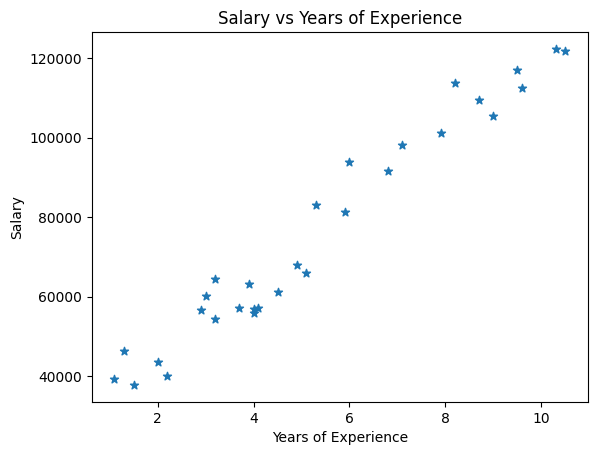

In [ ]:
import matplotlib.pyplot as plt

# Plotting the original data
plt.scatter(df.YearsExperience, df['Salary'], marker = '*')

# Adding labels and title to the plot
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')

# Display the plot
plt.show()

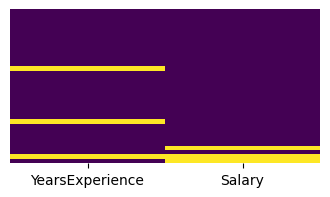

In [ ]:
#seaborn heatmap
import seaborn as sns

def get_heatmap(df):
  plt.figure(figsize=(4,2))
  sns.heatmap(df.isnull(),yticklabels = False, cbar=False, cmap='viridis')
  return plt.show()

get_heatmap(df)

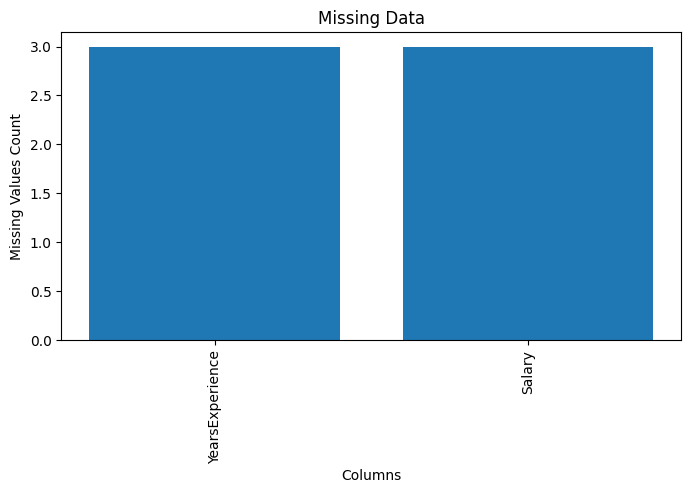

In [ ]:

import matplotlib.pyplot as plt

def plot_missing_data(df):
    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0]

    plt.figure(figsize=(8, 4))
    plt.bar(missing_data.index, missing_data.values)
    plt.xlabel('Columns')
    plt.ylabel('Missing Values Count')
    plt.title('Missing Data')
    plt.xticks(rotation='vertical')
    plt.show()

plot_missing_data(df)



**3. Data Preprocessing**

In [ ]:
#We'll replace the missing values with appropriate values, such as the median or mean.
median_value = df['YearsExperience'].median()
mean_value = df['Salary'].mean()

df['YearsExperience'] = df['YearsExperience'].fillna(median_value)
df['Salary'] = df['Salary'].fillna(mean_value)


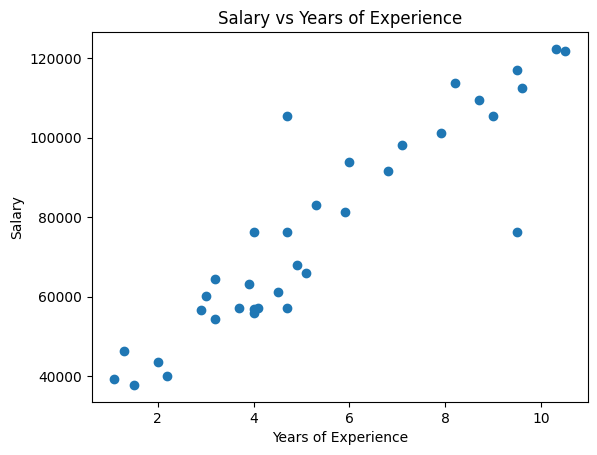

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.show()


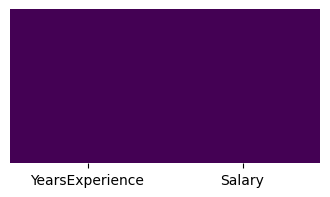

In [ ]:
import seaborn as sns

def get_heatmap(df):
  plt.figure(figsize=(4,2))
  sns.heatmap(df.isnull(),yticklabels = False, cbar=False, cmap='viridis')
  return plt.show()

get_heatmap(df)

**4. Training And Testing Sets**

In [ ]:
'''The train_test_split function is used, where we specify the test size as 0.2,
meaning 20% of the data will be used for testing, and the remaining 80% will be
used for training. We set random_state to 42 to ensure reproducibility.'''

'The train_test_split function is used, where we specify the test size as 0.2,\nmeaning 20% of the data will be used for testing, and the remaining 80% will be\nused for training. We set random_state to 42 to ensure reproducibility.'

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1:].values

print("Input features (X):")
print(X)
print("Target variable (Y):")
print(y)


Input features (X):
[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.7]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 4.7]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]
 [ 9. ]
 [ 4. ]
 [ 4.1]
 [ 4.7]
 [ 9.5]]
Target variable (Y):
[[ 39343.     ]
 [ 46205.     ]
 [ 37731.     ]
 [ 43525.     ]
 [ 39891.     ]
 [ 56642.     ]
 [ 60150.     ]
 [ 54445.     ]
 [ 64445.     ]
 [ 57189.     ]
 [ 63218.     ]
 [ 55794.     ]
 [ 56957.     ]
 [ 57081.     ]
 [ 61111.     ]
 [ 67938.     ]
 [ 66029.     ]
 [ 83088.     ]
 [ 81363.     ]
 [ 93940.     ]
 [ 91738.     ]
 [ 98273.     ]
 [101302.     ]
 [113812.     ]
 [109431.     ]
 [105582.     ]
 [116969.     ]
 [112635.     ]
 [122391.     ]
 [121872.     ]
 [105582.     ]
 [ 76336.03125]
 [ 57081.     ]
 [ 76336.03125]
 [ 76336.03125]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


**5: Train the linear regression model**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**6: Predict the salaries**

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[118130.65884715],
       [ 86945.27499232],
       [ 72616.85538334],
       [ 69245.46253417],
       [ 96216.60532754],
       [ 98745.14996442],
       [105487.93566276]])

**7: Evaluate the model**

In [ ]:
#Errors
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mean_actual_value = y_test.mean()
mae_percentage = (mae / mean_actual_value) * 100
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error (%):', mae_percentage)
print('R-squared:', r2)



Mean Absolute Error (%): 10.157676901815762
R-squared: 0.15220264650146131


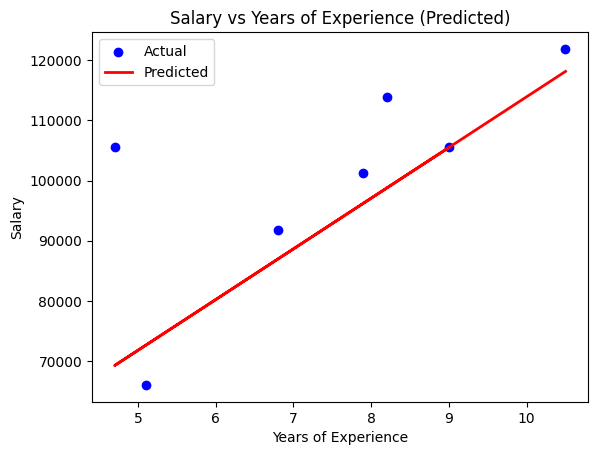

In [ ]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience (Predicted)')
plt.legend()
plt.show()


**Evaluation**

In [ ]:
model.score(X_test,y_test)*100

15.220264650146131

In [ ]:
model.score(X_train,y_train)*100

84.79850162986186

In [ ]:
model.score(X,y)*100

82.37464294742988

**SCRIPT**

In [ ]:
Salary  = int(input("Enter Years of Experience You Have : "))

y_pred = model.coef_*Salary+model.intercept_

y_pred

Enter Years of Experience You Have : 5


array([[71774.00717104]])